In [114]:
import numpy as np
import itertools as it
print('hello')

hello


In [115]:
x = np.array([5.5,5,7,9])
x.astype(int)

array([5, 5, 7, 9])

In [191]:
random_vectors = np.random.choice(range(1, 11), size = (5,5,2))
norms = np.reshape(np.linalg.norm(random_vectors, axis=2), (5,5,1))

In [192]:
gradient_landscape = np.array(np.divide(random_vectors, norms))

In [193]:
def dotGridGradient(ix, x, gradient_landscape = gradient_landscape):
    # Compute the distance vector
    dx = x - ix
    grad_vector = gradient_landscape[ix[0], ix[1]]
    return np.dot(dx, grad_vector)


def perlin(x):
    #xs is 5 dimensional real vector
    #determine grid cell around point:
    x = np.array(x)
    x0 = x.astype(int)
    sx_base = x - x0
    #next we consider the other corners of the cube:
    dimensions = len(x)
    zero_add = list(it.product(range(2), repeat = dimensions))
    num_of_corners = len(zero_add)
    x1_corners = np.zeros((num_of_corners, dimensions))
    sx_distances = np.zeros(num_of_corners).tolist()
    for k in range(num_of_corners):
        x1_corners[k]= (x0 + list(zero_add[k]))
        sx_distances[k] = np.absolute(np.subtract(zero_add[k], sx_base))
    x1_corners = np.array(x1_corners).astype(int)

    corner_dot_gradients = zero_add
    for d in range(num_of_corners):
        corner_dot_gradients[d] = dotGridGradient(x1_corners[d], x)
        
    def interpolation():
        result = 0
        for d in range(num_of_corners):
            weights = np.ones(len(sx_distances[d])) - sx_distances[d]
            interpolation_factor = np.product(weights)
            contribution = interpolation_factor*corner_dot_gradients[d]
            #print('corner, inter factor, corner dot grad, contribution')
            #print(x1_corners[d], interpolation_factor, corner_dot_gradients[d],contribution)
            result += contribution
        return result
    
    return interpolation()


In [201]:
landscape = [[perlin([x/40,y/40]) for y in range(1,160)] for x in range(1,160)]
print('hello')

hello


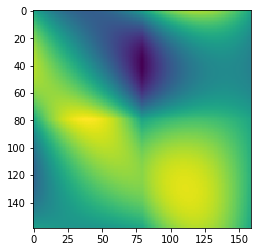

In [202]:
from matplotlib import pyplot as plt
plt.imshow(landscape, interpolation='nearest')
plt.show()     

In [122]:
def lerp(a0, a1, w):
    return (1-w)*a0 + w*a1

def dotGridGradient1(ix, iy, x, y, gradient_landscape=gradient_landscape):
    # Compute the distance vector
    dx = x - ix
    dy = y - iy

    return (dx*gradient_landscape[iy][ix][0] + dy*gradient_landscape[iy][ix][1])

def perlin1(x, y):
    #determine grid cell around point:

    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

    
    #now we get the perlin noise:
    #first calculate the weights:
    #could use some other weighting polynomail /s curve
    sx = x - x0
    sy = y - y0
    
    #interpolate between grid points
    n0 = dotGridGradient1(x0, y0, x, y)
    n1 = dotGridGradient1(x1, y0, x, y)
    ix0 = lerp(n0, n1, sx)


    n0 = dotGridGradient1(x0, y1, x, y)
    n1 = dotGridGradient1(x1, y1, x, y)
    ix1 = lerp(n0, n1, sx)

    value = lerp(ix0, ix1, sy)
    return value



In [128]:
landscape1 = [perlin1(x/100,y/100) for x in range(0,90) for y in range(0,90)]
print('done')

done


In [129]:
landscape1 = (np.reshape(np.array(landscape1), (90,90)))
print(landscape1)

[[ 0.          0.00476065  0.00942512 ...  0.05438678  0.05078023
   0.04707751]
 [-0.00215135  0.00261247  0.00728201 ...  0.0595967   0.0561581
   0.05262521]
 [-0.00425925  0.00050579  0.00517844 ...  0.06467974  0.06140712
   0.05804212]
 ...
 [-0.02457759 -0.02686583 -0.02908547 ...  0.03296383  0.03664345
   0.04039167]
 [-0.02294778 -0.02540319 -0.02778811 ...  0.02713454  0.03081176
   0.03455946]
 [-0.0212745  -0.02389905 -0.02645121 ...  0.02117836  0.02485121
   0.02859645]]


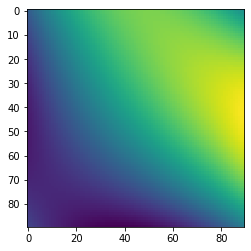

In [130]:
from matplotlib import pyplot as plt
plt.imshow(landscape1, interpolation='nearest')
plt.show()



In [ ]:
print(perlin([3.4,3]), perlin1(3.4, 3))
